### 統計學習與深度學習 (Fall, 2025)
### Homework 1

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。
如無其他規定，所有重要結果應顯示至小數點第四位(四捨五入)。


### 第一題 [Ridge Regression Baseline]

(30%) 以Ridge Regression進行房價預測。盡可能使用scikit-learn的函數與numpy進行實作。Regularizaiton coefficient (alphas)應考慮介於0.01至100之間的數值，且至少應考慮十種可能的數值。

本題禁止使用'Auto-SKlearn'或其他'AutoML'工具。

訓練資料檔案為'housing_5cities_train.csv', 測試資料檔案為 'housing_5cities_testa.csv'。預測標的為'單價'。你的模型應包含以下特徵:
* 建物面積
* 總樓層數
* 屋齡
* 縣市
* 鄉鎮市區
* 主要用途
* 主要建材
* 建物型態

類別型特徵應進行適當的轉換。

(1) 畫出高雄市資料點的分布，橫坐標為x軸，縱坐標為y軸。依照單價將資料點上色。說明你對資料點個觀察。

(2) 列出最終選用的Regularization Coefficient，以下模型參數，並報告模型在測試資料的預測能力 (包含R2、RMSE、MAE、MAPE)。
* Constant term coefficient
* 建物面積
* 總樓層數
* 屋齡
* 台中市
* 台北市
* 新北市
* 桃園市
* 高雄市

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Heiti TC'

train_path = "housing_5cities_train.csv"
test_path = "housing_5cities_testa.csv"
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

col_info = pd.DataFrame({
    "Column": df_train.columns,
    "Type": ["Numeric" if pd.api.types.is_numeric_dtype(df_train[col]) else "Categorical" for col in df_train.columns]
})

# print(col_info)

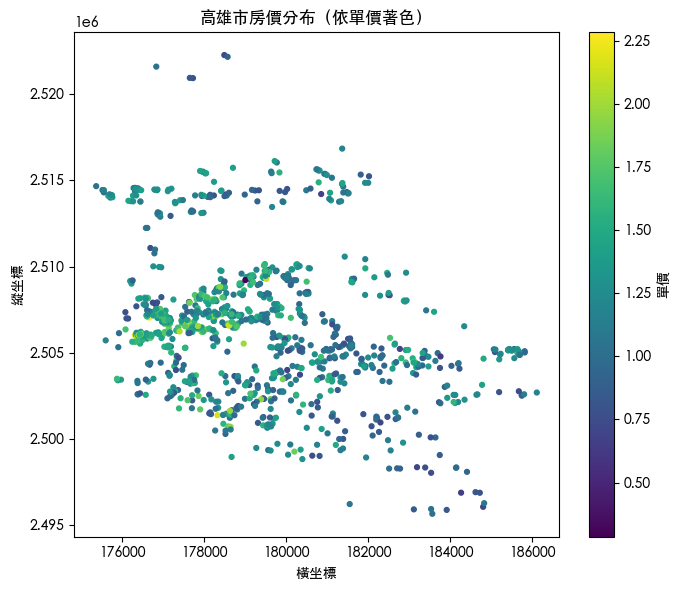

In [64]:
kao = df_train[df_train['縣市'] == '高雄市'].dropna(subset=['橫坐標', '縱坐標', '單價'])


plt.figure(figsize=(7, 6))
sc = plt.scatter(kao['橫坐標'], kao['縱坐標'],
                 c=kao['單價'], s=12, cmap='viridis')
plt.xlabel('橫坐標')
plt.ylabel('縱坐標')
plt.title('高雄市房價分布（依單價著色）')
plt.colorbar(sc, label='單價')
plt.tight_layout()
plt.show()

In [86]:
# Ridge Regression 實作
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# 特徵選擇
features = [
    "建物面積", "總樓層數", "屋齡", "縣市", "鄉鎮市區", "主要用途", "主要建材", "建物型態"
]
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train["單價"]
y_test = df_test["單價"]

# 類別型特徵 one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# RidgeCV: 自動選擇最佳 alpha (移除 store_cv_values 參數)
alphas = np.logspace(-2, 2, 100)
# print(alphas)
model = RidgeCV(alphas=alphas)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # 手動計算 RMSE
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

print(f"Best alpha: {model.alpha_:.4f}")
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(coef_df.head(8))

Best alpha: 0.6579
R2: 0.7681
RMSE: 0.5043
MAE: 0.2817
MAPE: 13.2903%
  Feature  Coefficient
0    建物面積     0.002396
1    總樓層數     0.004796
2      屋齡    -0.021312
3  縣市_台中市    -0.452481
4  縣市_台北市     1.638970
5  縣市_新北市     0.040620
6  縣市_桃園市    -0.623629
7  縣市_高雄市    -0.603481


In [79]:
import pandas as pd

coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

# 可以依照係數大小排序
# coef_df = coef_df.sort_values(by="Coefficient", ascending=False).reset_index(drop=True)

print(coef_df.head(20))  # 看前20個

     Feature  Coefficient
0       建物面積     0.002616
1       總樓層數     0.033119
2         屋齡    -0.311565
3     縣市_台中市    -0.452495
4     縣市_台北市     1.638953
5     縣市_新北市     0.040621
6     縣市_桃園市    -0.623594
7     縣市_高雄市    -0.603484
8   鄉鎮市區_三峽區    -0.159403
9   鄉鎮市區_三民區    -0.010924
10  鄉鎮市區_三重區     0.417792
11   鄉鎮市區_中區    -0.006454
12  鄉鎮市區_中和區     0.501973
13  鄉鎮市區_中壢區     0.097790
14  鄉鎮市區_中山區     0.429503
15  鄉鎮市區_中正區     0.662395
16  鄉鎮市區_五股區    -0.318688
17  鄉鎮市區_仁武區    -0.177623
18  鄉鎮市區_信義區     0.625861
19  鄉鎮市區_內湖區    -0.176248


In [73]:
print(df_train.columns)

Index(['縣市', '鄉鎮市區', '路名', '土地面積', '使用分區', '移轉層次', '總樓層數', '主要用途', '主要建材',
       '建物型態', '屋齡', '建物面積', '車位面積', '車位個數', '橫坐標', '縱坐標', '備註', '主建物面積',
       '陽台面積', '附屬建物面積', '單價', 'GBF_台中市_0', 'GBF_台中市_1', 'GBF_台中市_2',
       'GBF_台中市_3', 'GBF_台中市_4', 'GBF_台北市_5', 'GBF_台北市_6', 'GBF_台北市_7',
       'GBF_台北市_8', 'GBF_台北市_9', 'GBF_台北市_10', 'GBF_台北市_11', 'GBF_台北市_12',
       'GBF_新北市_13', 'GBF_新北市_14', 'GBF_新北市_15', 'GBF_新北市_16', 'GBF_新北市_17',
       'GBF_新北市_18', 'GBF_桃園市_19', 'GBF_桃園市_20', 'GBF_桃園市_21', 'GBF_桃園市_22',
       'GBF_桃園市_23', 'GBF_高雄市_24', 'GBF_高雄市_25', 'GBF_高雄市_26', 'GBF_高雄市_27',
       'GBF_高雄市_28', 'GBF_高雄市_29', 'GBF_高雄市_30', 'GBF_高雄市_31'],
      dtype='object')


In [92]:
# Ridge Regression with Standardization
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 特徵選擇
num_features = ["建物面積", "總樓層數", "屋齡", "主建物面積", "橫坐標", "縱坐標", "車位面積"]  # 數值型特徵
cat_features = ["縣市", "鄉鎮市區", "主要用途", "主要建材", "建物型態"]  # 類別型特徵

X_train_num = df_train[num_features]
X_test_num  = df_test[num_features]
X_train_cat = df_train[cat_features]
X_test_cat  = df_test[cat_features]

y_train = df_train["單價"]
y_test  = df_test["單價"]

# 1️⃣ 數值型特徵 → 標準化
scaler = StandardScaler()
X_train_num = pd.DataFrame(
    scaler.fit_transform(X_train_num), 
    columns=num_features, index=df_train.index
)
X_test_num = pd.DataFrame(
    scaler.transform(X_test_num), 
    columns=num_features, index=df_test.index
)

# 2️⃣ 類別型特徵 → one-hot encoding
X_train_cat = pd.get_dummies(X_train_cat)
X_test_cat  = pd.get_dummies(X_test_cat)
X_train_cat, X_test_cat = X_train_cat.align(X_test_cat, join="left", axis=1, fill_value=0)

# 3️⃣ 合併數值型 + 類別型
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test  = pd.concat([X_test_num,  X_test_cat], axis=1)

# 4️⃣ RidgeCV 訓練
alphas = np.logspace(-2, 2, 1000)
model = RidgeCV(alphas=alphas)
model.fit(X_train, y_train)

# 5️⃣ 預測
y_pred = model.predict(X_test)

# 6️⃣ 評估
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"Best alpha: {model.alpha_:.4f}")
print(f"R2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print("Coefficients (前20個):")
print(dict(list(zip(X_train.columns, model.coef_))[:20]))

Best alpha: 0.0417
R2: 0.7769
RMSE: 0.4946
MAE: 0.2768
MAPE: 13.0918%
Coefficients (前20個):
{'建物面積': 0.03772199173545232, '總樓層數': 0.033076153113441364, '屋齡': -0.2653445108773269, '主建物面積': -0.06505964862674318, '橫坐標': 0.9782987553755333, '縱坐標': 1.9307030924321964, '車位面積': 0.07537471206660484, '縣市_台中市': 0.8447307377740998, '縣市_台北市': -0.8566101047487109, '縣市_新北市': -2.4573682405917907, '縣市_桃園市': -2.3168224663287305, '縣市_高雄市': 4.7860700738938675, '鄉鎮市區_三峽區': 0.2932724373429285, '鄉鎮市區_三民區': 0.353059391623173, '鄉鎮市區_三重區': 0.305538309434624, '鄉鎮市區_中區': 0.1672890848746199, '鄉鎮市區_中和區': 0.5472722430386625, '鄉鎮市區_中壢區': -0.025208789788354835, '鄉鎮市區_中山區': 0.22506280817751545, '鄉鎮市區_中正區': 0.5760139117358847}


In [88]:
# 選擇數值型欄位
num_cols = [
    "土地面積", "總樓層數", "屋齡", "建物面積", "車位面積", "車位個數",
    "橫坐標", "縱坐標", "主建物面積", "陽台面積", "附屬建物面積", "單價"
]

# 計算相關係數矩陣
corr = df_train[num_cols].corr()

# 抓出與 "單價" 的相關係數
target_corr = corr["單價"].drop("單價").sort_values(ascending=False)
print("各數值型特徵與單價的相關性：\n", target_corr)

各數值型特徵與單價的相關性：
 橫坐標       0.493810
縱坐標       0.391860
土地面積      0.073671
車位面積      0.068402
屋齡        0.061064
附屬建物面積    0.050467
建物面積      0.036088
主建物面積     0.033491
陽台面積     -0.002731
總樓層數     -0.007820
車位個數     -0.013102
Name: 單價, dtype: float64


In [76]:
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

X = df_train[num_cols].drop("單價", axis=1)
y = df_train["單價"]

# 標準化避免單位差異影響
X_scaled = StandardScaler().fit_transform(X)

f_vals, p_vals = f_regression(X_scaled, y)

feature_scores = pd.DataFrame({
    "Feature": X.columns,
    "F_value": f_vals,
    "p_value": p_vals
}).sort_values(by="F_value", ascending=False)

print(feature_scores)

   Feature      F_value        p_value
6      橫坐標  2624.395813   0.000000e+00
7      縱坐標  1476.320494  5.674682e-297
0     土地面積    44.408942   2.838119e-11
4     車位面積    38.255569   6.505509e-10
2       屋齡    30.458998   3.514790e-08
10  附屬建物面積    20.779541   5.228290e-06
3     建物面積    10.612025   1.128152e-03
8    主建物面積     9.138358   2.510850e-03
5     車位個數     1.397267   2.372162e-01
1     總樓層數     0.497693   4.805359e-01
9     陽台面積     0.060714   8.053779e-01


### 第二題 [Gaussian Basis Function]

(35%) Gaussian Basis Function (GBF) 常用來擴展特徵。在房價預測中，我們可以挑選某些位置作為GBF的均數，並設定合理的變異數，即可利用GBF識別某筆資料是否為在選定的位置附近。

我們在課程中定義過一維情境下計算GBF特徵值的公式為:

$exp(- \frac{(x_a - \mu_j)^2}{2 s_j^2}), $

其中 $x_a$ 為資料點，而 $mu_j$  是選定的錨點 (Anchor)，標準差$s_j$ 是用來控管要訂多寬的區域。

房價資料的位置資訊為二維空間，因此如果資料點的位置是 $(x_a, y_a)$, 錨點是 $(\mu_{xj}, \mu_{yj})$、標準差是 $(s_{xj}, s_{yj})$，那GBF特徵值為:

$exp(- \frac{(x_a - \mu_{xj})^2}{2 s_{xj}^2} - \frac{(y_a - \mu_{yj})^2}{2 s_{yj}^2} )$

(1) 

這題我們只選擇一個錨點，定義為所有高雄市訓練資料的橫、縱座標平均值。橫軸的標準差取為高雄市訓練資料的 X 座標標準差，縱軸則取為 Y 座標的標準差。利用上面的公式計算 GBF 特徵值。請列出該錨點的座標與標準差，並為所有訓練資料計算 GBF 特徵值，依照縣市輸出描述統計（count, mean, std, min, 25%, 50%, 75%, max）。

(2) 

依照以下方式產生多個錨點，並使用 GBF 生成新的特徵，與 Q1 的所有特徵合併後，建構新的 Ridge Regression 預測模型，並計算其在測試資料上的預測能力（包含 R²、RMSE、MAE、MAPE）。

Regularizaiton coefficient (alphas)應考慮介於 0.01 至 100 之間的數值，且至少應考慮十種可能的數值。對每個城市 C，找出能包含所有資料點的邊界矩形，並將橫軸與縱軸各切成 $K$ 等分，形成 $K^2$ 個格子。若一個格子內有不少於 20 筆資料，則計算該格子內所有資料點的橫、縱座標平均值作為中心點，橫、縱座標的標準差作為尺度，定義為一個錨點；若一個格子內的資料點少於 20，則忽略該格子。請列出各縣市所產生的錨點。設 $K$ = 3，請計算模型在測試資料上的 R²、RMSE、MAE、MAPE，並與 Q1 baseline 結果比較。



In [67]:
kaohsiung = df_train[df_train['縣市'] == '高雄市']

mu_x = np.mean(kaohsiung['橫坐標'])
mu_y = np.mean(kaohsiung['縱坐標'])
std_x = np.std(kaohsiung['橫坐標'])
std_y = np.std(kaohsiung['縱坐標'])

print("高雄錨點中心：")
print(f"mu_x = {mu_x:.2f}, mu_y = {mu_y:.2f}")
print("高雄標準差：")
print(f"std_x = {std_x:.2f}, std_y = {std_y:.2f}")

高雄錨點中心：
mu_x = 179372.99, mu_y = 2506459.42
高雄標準差：
std_x = 2313.74, std_y = 4031.49


In [68]:
# gbf function
def gbf(x, y, mu_x, mu_y, std_x, std_y):
    return np.exp(-((x - mu_x)**2) / (2 * std_x**2) - ((y - mu_y)**2) / (2 * std_y**2))

df_train["GBF_高雄中心"] = gbf(df_train["橫坐標"], df_train["縱坐標"], mu_x, mu_y, std_x, std_y)

group_stats = df_train.groupby("縣市")["GBF_高雄中心"].describe()
print("各縣市 GBF 特徵值統計：")
print(group_stats)
df_train = df_train.drop(columns=["GBF_高雄中心"])

各縣市 GBF 特徵值統計：
      count      mean       std       min       25%       50%       75%  \
縣市                                                                        
台中市   810.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
台北市  1906.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
新北市  3432.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
桃園市   925.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
高雄市  1067.0  0.518916  0.292751  0.000429  0.258249  0.558919  0.762814   

          max  
縣市             
台中市  0.000000  
台北市  0.000000  
新北市  0.000000  
桃園市  0.000000  
高雄市  0.994376  


(2)

In [69]:
anchors = []

K = 3
for city, group in df_train.groupby("縣市"):
    x_min, x_max = group["橫坐標"].min(), group["橫坐標"].max()
    y_min, y_max = group["縱坐標"].min(), group["縱坐標"].max()
    
    x_bins = np.linspace(x_min, x_max, K + 1)
    y_bins = np.linspace(y_min, y_max, K + 1)
    
    for i in range(K):
        for j in range(K):
            cell = group[
                (group["橫坐標"] >= x_bins[i]) & (group["橫坐標"] < x_bins[i+1]) &
                (group["縱坐標"] >= y_bins[j]) & (group["縱坐標"] < y_bins[j+1])
            ]
            if len(cell) >= 20:  # 至少20筆
                mu_x, mu_y = cell["橫坐標"].mean(), cell["縱坐標"].mean()
                std_x, std_y = cell["橫坐標"].std(), cell["縱坐標"].std()
                anchors.append({"縣市": city, "mu_x": mu_x, "mu_y": mu_y, "std_x": std_x, "std_y": std_y})
                
anchors_df = pd.DataFrame(anchors)
print("各縣市產生的錨點：")
print(anchors_df)
print("錨點數量：", len(anchors_df))


各縣市產生的錨點：
     縣市           mu_x          mu_y        std_x        std_y
0   台中市  214825.103093  2.668598e+06  1161.683876  1065.550833
1   台中市  213825.316216  2.672811e+06  1736.699725  1864.095651
2   台中市  218624.563636  2.667625e+06  1209.824287  1484.271674
3   台中市  219338.375527  2.673602e+06  1580.053842  1621.124428
4   台中市  220401.681818  2.680643e+06  1183.875291  2608.959296
5   台北市  300711.666667  2.768906e+06   718.556809   534.045821
6   台北市  301296.239726  2.772117e+06   551.759722  1741.343004
7   台北市  300595.487603  2.779851e+06  1339.924887  1610.892661
8   台北市  304968.337209  2.768095e+06  1362.624504  1563.030569
9   台北市  304675.449558  2.772125e+06  1447.151112  1477.734432
10  台北市  303477.958333  2.778399e+06   930.635461  1187.255045
11  台北市  307985.689655  2.766744e+06   514.594550  2023.753722
12  台北市  309774.697143  2.773019e+06  1471.474404  1687.713348
13  新北市  292369.033661  2.763437e+06  4315.414753  2777.628061
14  新北市  293614.664350  2.772100e+06  3413.78

In [70]:
for idx, row in anchors_df.iterrows():
    name = f"GBF_{row['縣市']}_{idx}"
    df_train[name] = gbf(df_train["橫坐標"], df_train["縱坐標"], row["mu_x"], row["mu_y"], row["std_x"], row["std_y"])
    df_test[name]  = gbf(df_test["橫坐標"], df_test["縱坐標"], row["mu_x"], row["mu_y"], row["std_x"], row["std_y"])


In [71]:
# 原始 baseline 特徵 (Q1)
baseline_features = ["建物面積", "總樓層數", "屋齡", "縣市", "鄉鎮市區", "主要用途", "主要建材", "建物型態"]

# One-hot encoding
X_train_base = pd.get_dummies(df_train[baseline_features], drop_first=True)
X_test_base = pd.get_dummies(df_test[baseline_features], drop_first=True)

# 加入 GBF 特徵
gbf_features = [col for col in df_train.columns if col.startswith("GBF_")]
X_train = pd.concat([X_train_base, df_train[gbf_features]], axis=1)
X_test = pd.concat([X_test_base, df_test[gbf_features]], axis=1)

# 對齊欄位（避免測試集少欄位）
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)

y_train = df_train["單價"]
y_test = df_test["單價"]

# RidgeCV 交叉驗證挑 alpha
alphas = np.logspace(-2, 2, 20)  # 0.01 到 100
model = RidgeCV(alphas=alphas, cv=5)
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# ========== Step 6: 評估 ==========
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Ridge Regression with GBF Features")
print(f"Best alpha: {model.alpha_:.4f}")
print(f"R²   = {r2:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAE  = {mae:.4f}")
print(f"MAPE = {mape:.2f}%")

Ridge Regression with GBF Features
Best alpha: 0.4833
R²   = 0.7798
RMSE = 0.4915
MAE  = 0.2717
MAPE = 12.85%


In [72]:
# ===== Q2(2): 多錨點 GBF + 與 Q1 同步的 RidgeCV 管線 =====
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ---- 讀資料 (沿用你現有的 df_train / df_test 變數亦可) ----
# df_train = pd.read_csv("housing_5cities_train.csv")
# df_test  = pd.read_csv("housing_5cities_testa.csv")

# ---- 與 Q1 完全一致的 baseline features ----
baseline_features = [
    "建物面積", "總樓層數", "屋齡",
    "縣市", "鄉鎮市區", "主要用途", "主要建材", "建物型態"
]
target_col = "單價"

# ---- GBF 函數（含 0-std 防呆）----
def gbf_2d(x, y, mu_x, mu_y, std_x, std_y, eps=1e-8):
    sx2 = (std_x if std_x > 0 else eps)**2
    sy2 = (std_y if std_y > 0 else eps)**2
    return np.exp(-((x - mu_x)**2)/(2*sx2) - ((y - mu_y)**2)/(2*sy2))

# ---- 依題意產生 anchors：每縣市邊界矩形切 K×K，格子內樣本>=20 才取均值/標準差 ----
def build_anchors_by_city(df, K=3, min_count=20):
    anchors = []
    for city, g in df.groupby("縣市"):
        x_min, x_max = g["橫坐標"].min(), g["橫坐標"].max()
        y_min, y_max = g["縱坐標"].min(), g["縱坐標"].max()
        x_bins = np.linspace(x_min, x_max, K+1)
        y_bins = np.linspace(y_min, y_max, K+1)
        for i in range(K):
            for j in range(K):
                cell = g[
                    (g["橫坐標"] >= x_bins[i]) & (g["橫坐標"] < x_bins[i+1]) &
                    (g["縱坐標"] >= y_bins[j]) & (g["縱坐標"] < y_bins[j+1])
                ]
                if len(cell) >= min_count:
                    mu_x = cell["橫坐標"].mean()
                    mu_y = cell["縱坐標"].mean()
                    std_x = cell["橫坐標"].std()
                    std_y = cell["縱坐標"].std()
                    anchors.append({
                        "縣市": city,
                        "mu_x": mu_x, "mu_y": mu_y,
                        "std_x": std_x, "std_y": std_y
                    })
    return pd.DataFrame(anchors)

# ---- 用 train 產生 anchors，並將 GBF 特徵加到 train/test ----
K = 3
anchors_df = build_anchors_by_city(df_train, K=K, min_count=20)

print("各縣市產生的錨點（前幾筆）：")
print(anchors_df.head())
print("錨點總數：", len(anchors_df))

# 沒有 anchor 也要能跑（極端情況）
if anchors_df.empty:
    print("⚠️ 警告：沒有任何格子達到 min_count，無法產生錨點。將只使用 Q1 baseline 特徵。")
    gbf_feature_names = []
else:
    # 為每個 anchor 生成一個 GBF 特徵欄位（命名保留城市資訊與流水號）
    gbf_feature_names = []
    for idx, row in anchors_df.iterrows():
        fname = f"GBF_{row['縣市']}_{idx}"
        gbf_feature_names.append(fname)
        df_train[fname] = gbf_2d(
            df_train["橫坐標"].values, df_train["縱坐標"].values,
            row["mu_x"], row["mu_y"], row["std_x"], row["std_y"]
        )
        df_test[fname] = gbf_2d(
            df_test["橫坐標"].values, df_test["縱坐標"].values,
            row["mu_x"], row["mu_y"], row["std_x"], row["std_y"]
        )

# ---- 準備設計矩陣：與 Q1 完全相同的 one-hot + align，再把 GBF 特徵接上 ----
X_train_base = pd.get_dummies(df_train[baseline_features])
X_test_base  = pd.get_dummies(df_test[baseline_features])

# 對齊 one-hot 欄位
X_train_base, X_test_base = X_train_base.align(X_test_base, join='left', axis=1, fill_value=0)

# 接上 GBF 特徵（若無 anchor，這步會接一個空 DataFrame，不影響）
X_train = pd.concat([X_train_base, df_train[gbf_feature_names]], axis=1) if gbf_feature_names else X_train_base.copy()
X_test  = pd.concat([X_test_base,  df_test[gbf_feature_names]],  axis=1) if gbf_feature_names else X_test_base.copy()

# 再保險一次欄位對齊（避免極端情況）
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

y_train = df_train[target_col].values
y_test  = df_test[target_col].values

# ---- 與 Q1 一致的 RidgeCV 設定 ----
alphas = np.logspace(-2, 2, 100)
model = RidgeCV(alphas=alphas)   # 預設 cv=5；如需更快可設 cv=3
model.fit(X_train, y_train)

# ---- 評估 ----
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\nRidge Regression with GBF Features (對齊 Q1 管線)")
print(f"Best alpha: {model.alpha_:.4f}")
print(f"R²   = {r2:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"MAE  = {mae:.4f}")
print(f"MAPE = {mape:.2f}%")
print(f"特徵數（含 one-hot 與 GBF）: {X_train.shape[1]}")
print(f"GBF 特徵數: {len(gbf_feature_names)}")

各縣市產生的錨點（前幾筆）：
    縣市           mu_x          mu_y        std_x        std_y
0  台中市  214825.103093  2.668598e+06  1161.683876  1065.550833
1  台中市  213825.316216  2.672811e+06  1736.699725  1864.095651
2  台中市  218624.563636  2.667625e+06  1209.824287  1484.271674
3  台中市  219338.375527  2.673602e+06  1580.053842  1621.124428
4  台中市  220401.681818  2.680643e+06  1183.875291  2608.959296
錨點總數： 32

Ridge Regression with GBF Features (對齊 Q1 管線)
Best alpha: 0.5462
R²   = 0.7799
RMSE = 0.4914
MAE  = 0.2716
MAPE = 12.84%
特徵數（含 one-hot 與 GBF）: 139
GBF 特徵數: 32


### 第三題 [Sigmoidal Basis Features]

(35%) 

(1) 

對每個數值特徵 $x$（建物面積、總樓層數、屋齡）建立5個 **Sigmoidal basis**：

$$
\phi(x;\mu,s) = \frac{1}{1 + \exp\!\left(-\frac{x-\mu}{s}\right)}
$$

其中 $\mu$（中心）以**訓練資料**該特徵的分位數決定（ $q \in \{0.1,0.3,0.5,0.7,0.9\}$）；  
$s$（斜率尺度）以**訓練資料**該特徵的 IQR（Q3 − Q1）之 $0.25$ 倍決定。  
請記錄各特徵所用的 $\mu$ 與 $s$，並以同一組參數轉換測試資料。 
請將計算結果輸出，包含：  
- 特徵名稱  
- 5 個對應的 $\mu$ 值  
- 該特徵的 $s$ 值   

(2) 

將本題產生的 Sigmoidal basis 特徵與 **Q1 的特徵**（**不加入 Q2 的 GBF**）合併，在訓練集選擇最佳 $\alpha$，Regularizaiton coefficient (alphas) 應考慮介於0.01至100之間的數值，且至少應考慮十種可能的數值。
請計算模型在測試資料上的 R²、RMSE、MAE、MAPE，並比較結果與 **Q1** 以及 **Q2** 之差異，說明 Sigmoidal basis 是否改善預測與可能原因。  
